In [236]:
import matplotlib.pyplot as plt
import random

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#5D7599",
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["\\\\", "", ""]

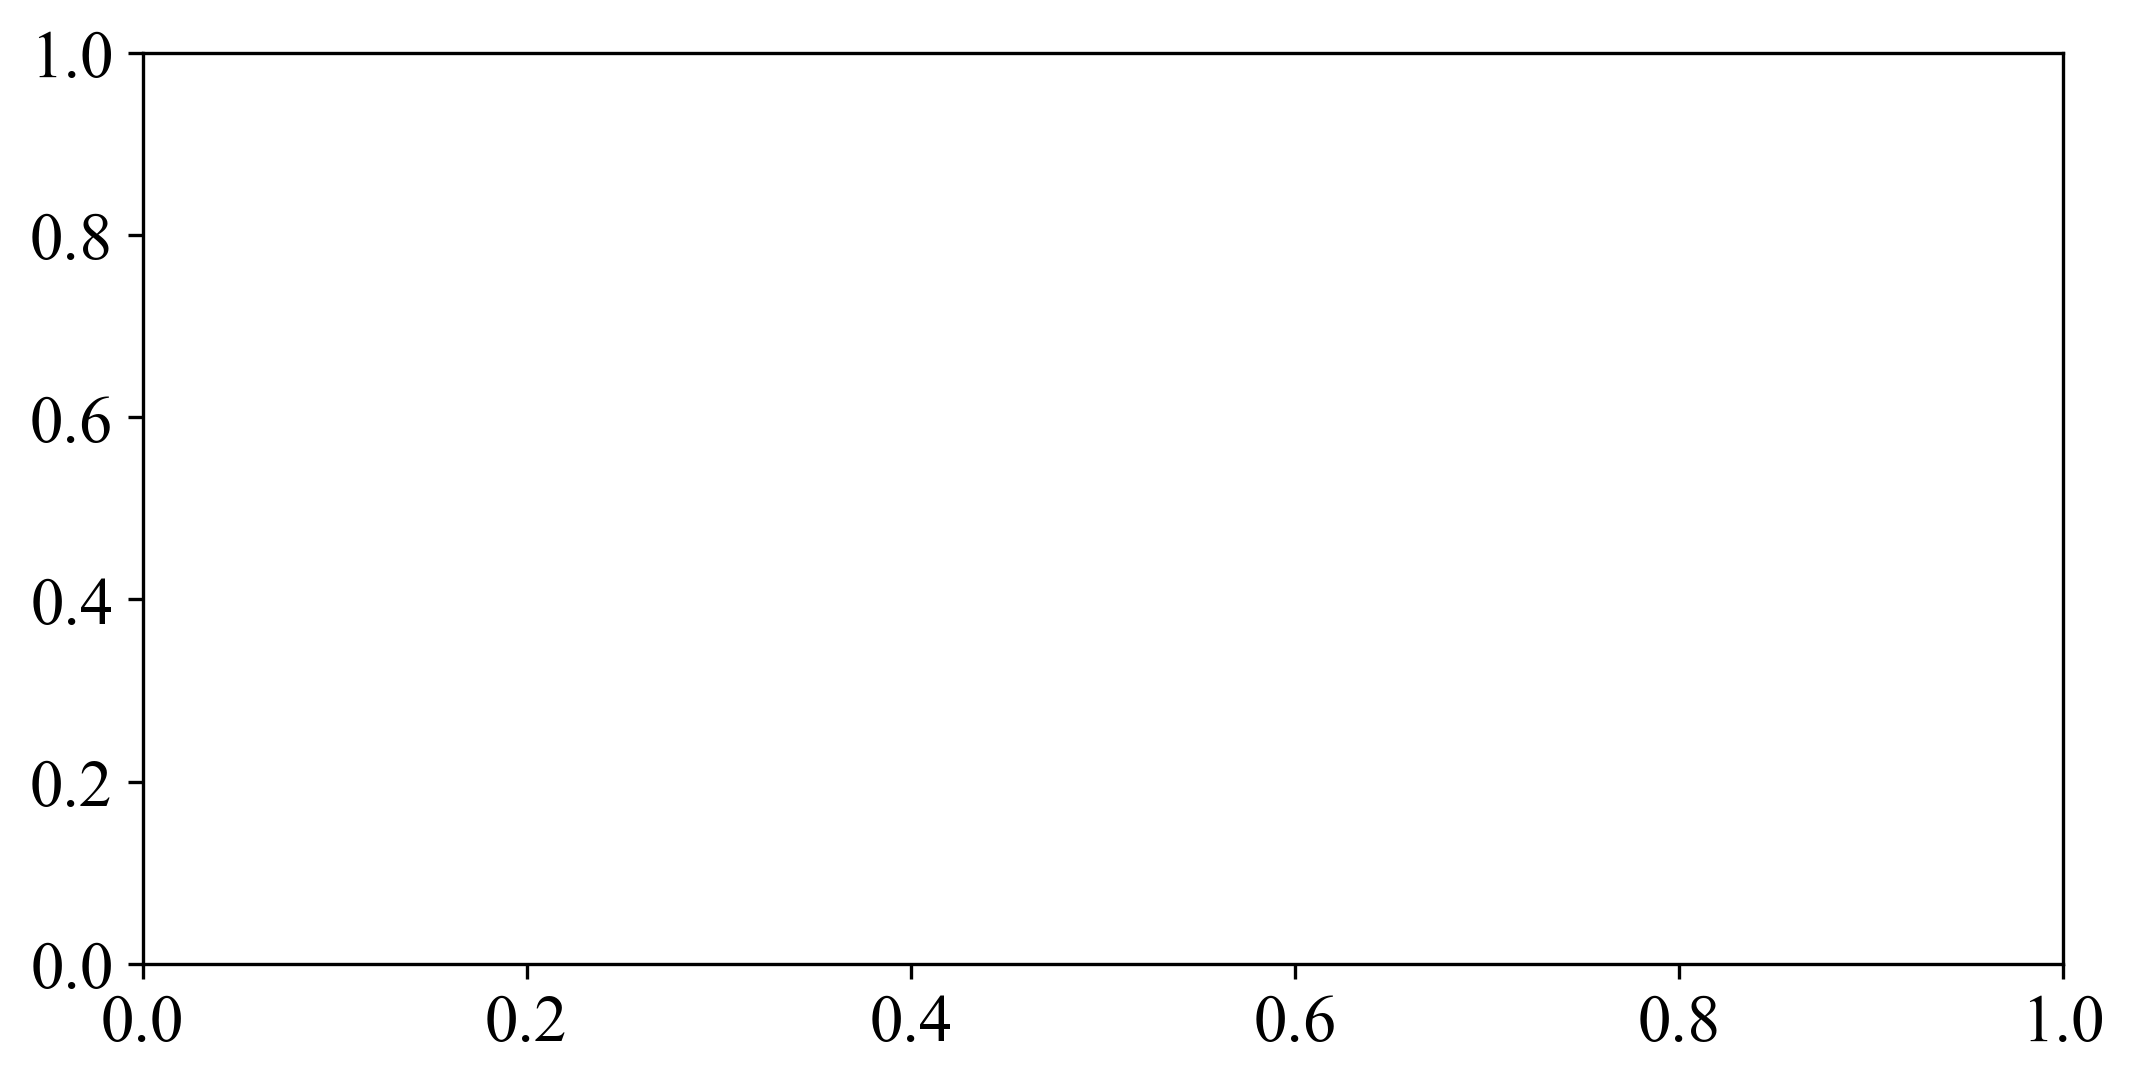

In [237]:
fig, ax = plt.subplots(
    figsize=(7, 7 / 2), ncols=1, nrows=1, constrained_layout=True, dpi=300
)

In [238]:
labels_name_a = [
    "1-node",
    "2-node",
    "4-node",
    "8-node",
]

In [239]:
# MFU
data_a = {
    labels_name_a[0]: [40.6, 0, 0],
    labels_name_a[1]: [40.6, 0, 0],
    labels_name_a[2]: [40.5, 0, 0],
    labels_name_a[3]: [40.5, 0, 0],
}

data_pa = []
data_pb = []
data_pc = []

for v in data_a.values():
    v[1] = v[0] * 0.82
    v[2] = v[0] * 1.2
    data_pa.append(v[0])
    data_pb.append(v[1])
    data_pc.append(v[2])

In [240]:
legend_labels = ["Megatron-LM", "XLA", "DLRover-Lynx"]


In [241]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

x_label_cnt = len(data_a.keys())
x_label_group_cnt = 3

for idx in range(x_label_cnt):
    group_positions[idx] = []
    for _ in range(x_label_group_cnt):
        group_positions[idx].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for idx, positions in group_positions.items():
    group_centers[idx] = sum(positions) / len(positions)

In [242]:
label_set = set()

x_a = []
x_b = []
x_c = []

for idx, (x_label, y_data) in enumerate(data_a.items()):
    positions = group_positions[idx]
    x_a.append(positions[0])
    x_b.append(positions[1])
    x_c.append(positions[2])

    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)

        ax.bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax.set_xticks(list(group_centers.values()))
ax.set_xticklabels(list(data_a.keys()))

ax.set_ylim(0, 100)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax.plot(x_a, data_pa, color=colors[0], marker="x", linestyle="--", alpha=0.68)
ax.plot(x_b, data_pb, color=colors[1], marker="v", linestyle="--", alpha=0.68)
ax.plot(x_c, data_pc, color=colors[2], marker="^", linestyle="--", alpha=0.68)


ax.tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax.tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)
ax.set_ylabel("MFU (%)", fontsize=g_label_fontsize)

Text(13.333333333333346, 0.5, 'MFU (%)')

In [243]:
fig.legend(
    ncol=3,
    loc="upper center",
    frameon=False,
    shadow=False,
    bbox_to_anchor=(0.5, 1.12),
    fontsize=g_label_fontsize,
)

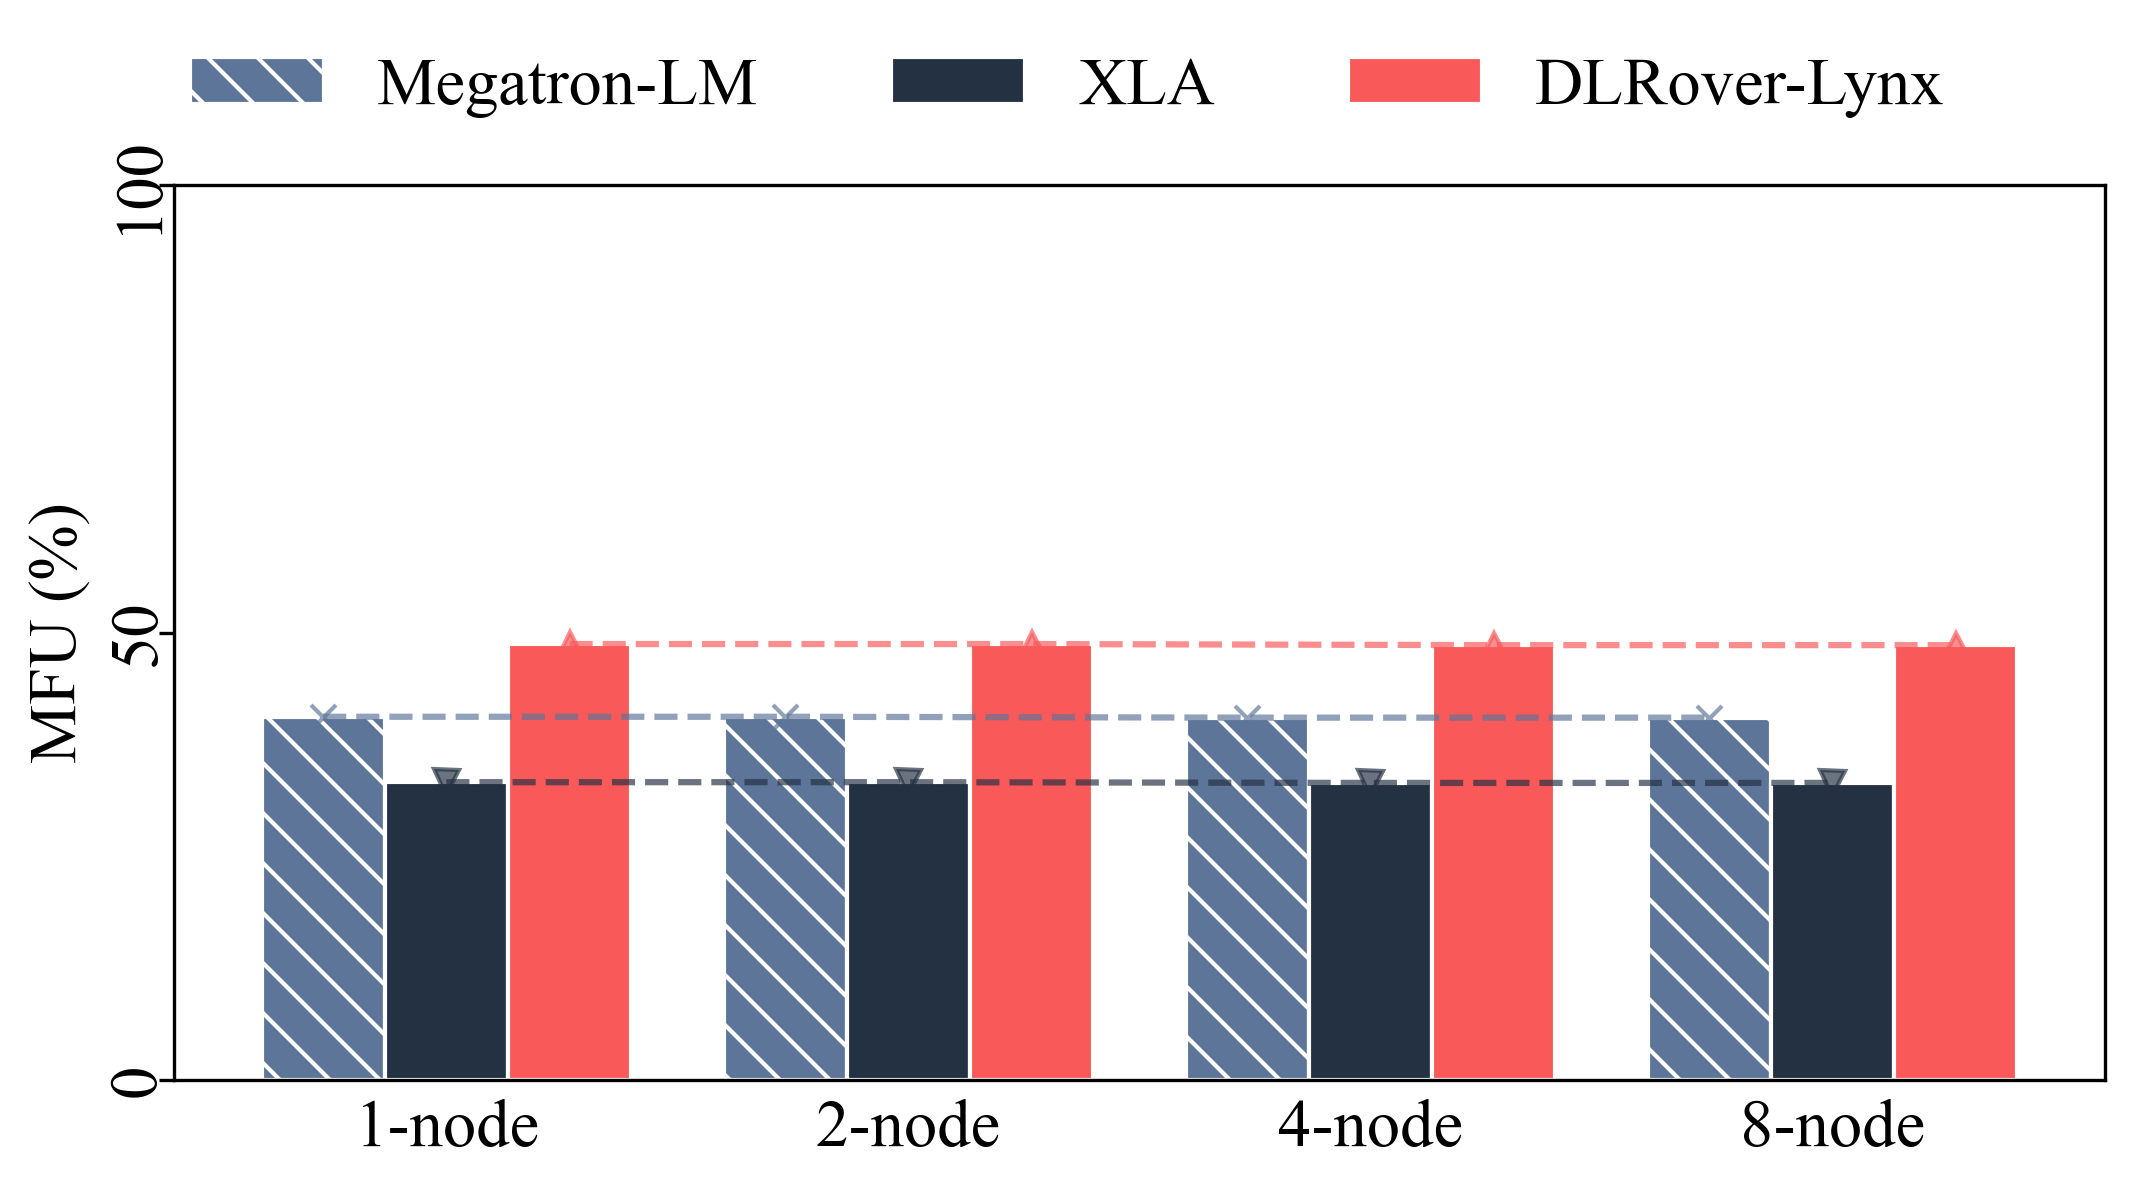

In [244]:
fig.savefig("scalability.pdf", bbox_inches="tight", dpi=1000)
fig